# Exploring Topic Modeling

Here we show how we explored topic modeling of tweets

In [1]:
%matplotlib inline

## Extracting the topics from the transcript

We use word

In [4]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition
from Politweet import get_tweets, get_transcript
import pandas as pd
from nltk.corpus import brown
import gensim, sys, os, codecs
pd.set_option('display.max_colwidth', 1200)

tweets = get_tweets("./datasets/tweets.tsv")

topics_raw = [
    ("healthcare", ['hospital', 'doctor', 'insurance']),
    ("war", ['war', 'iraq', 'iran', 'army']),
    ("economy", ['economy', 'money']),
    ("energy", ['energy'])
]

topics = [t[1] for t in topics_raw]
topicsDict = [t[0] for t in topics_raw] + ["none"]
no_topic = len(topicsDict) - 1


def train_word2vec_brown(output="datasets/brown_word2vec.model"):
    model = gensim.models.Word2Vec(brown.sents(), min_count=1)
    model.save(output)


def load_word2vec_model(model="datasets/brown_word2vec.model"):
    if os.path.isfile(model):
        return gensim.models.Word2Vec.load(model)

def highest(scores):
    high = np.argmax(scores)
    if type(scores[high]) is not np.float64:
        high = no_topic
    elif scores[high] < 0.8:
        high = no_topic
    return high

def get_topic(model, tokens, topics):
    tokens = [token for token in tokens if token in model]
    topics = [[w for w in topic if w in model] for topic in topics]
    sims = [model.n_similarity(topic, tokens) for topic in topics]
    high = highest(sims)
    return (topicsDict[high], sims[high] if high < len(sims) else 0)

model = load_word2vec_model()
tweets = get_tweets("datasets/tweets.tsv")

    
tweets['topics'] = tweets['tokens'].apply(lambda x: get_topic(model, x, topics)[0])
tweets['topics_s'] = tweets['tokens'].apply(lambda x: get_topic(model, x, topics)[1])

tweets[['topics', 'topics_s', 'content']][ tweets['topics'] != 'none' ]

,topics,topics_s,content
tweet.id,,,
936475544,war,0.911831,Obama -2 it an occupation not war #tweetdebate
936532362,economy,0.815887,Obama- I wanna keep spending money--his Early Childhood education is full of crap. #current #tweetdebate
936589772,war,0.868646,#tweetdebate A bracelet war???
936666392,war,0.861557,McCain plays the war hero card again! #current
936669848,economy,0.811658,"Did Sen. McCain talk of anything other than defense, veterans, and Sen. Obama this evening? No economy, education, healthcare, etc?#current"
936680136,energy,0.831097,where the hell were the environmental issues (besides energy)? #current
936719198,war,0.851079,"@stillgray exactly no diplomacy. war, war, war.....http://www.newamericancentury.org/ #current"
936519897,energy,1.000000,"Obama +3 quotable - ""energy indepedence"" ok. #tweetdebate"
936520121,energy,0.905390,Obama energy independence +3 #tweetdebate


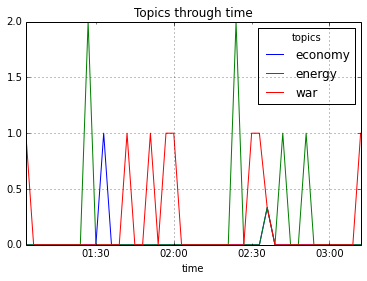

In [29]:
import datetime
tweets['time'] = tweets['pub.date.GMT'].apply(
    lambda x: ( datetime.datetime.strptime( x, "%m/%d/%y %H:%M" ))
)

#1
df = tweets[tweets['topics'] != 'none'].groupby(['time','topics']).size().unstack().fillna(0)
df.groupby(pd.TimeGrouper('3Min')).mean().fillna(0).plot(title="Topics through time")

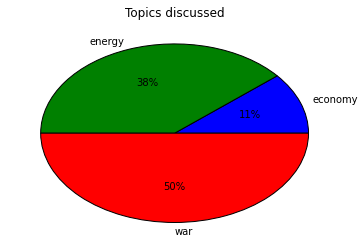

In [28]:
#2
tweets[tweets['topics'] != 'none'].groupby(['topics']).size().plot(kind='pie', autopct='%i%%', title="Topics discussed")